# Ford gobike Users Exploration

## Investigation Overview
In this investigation, I want to know which day of the week is the most busy, what is the most popular gender and user type, The top 10 start_station name, as well as What are the most popular station destination. The main focus was on start and end time,user type,member gender,start_station_name,end_station_name


## Dataset Overview

There are 183412 entries with 16 features (duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id,user_type,member_birth_year, member_gender, bike_share_for_all_trip).

Six(6) out of the 16 features has null values among its entries. The datatypes of the features vary between: int, object or float with some features represented in the wrong datatype such as start_time, end_time, end_station_id and member_birth_year

After dropping the NaN values, we have 174952 entries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
data.dropna(inplace = True)

In [4]:
data_clean = data.copy()

In [5]:
data_clean['start_time'] = pd.to_datetime(data_clean['start_time'], infer_datetime_format=True)
data_clean['end_time'] = pd.to_datetime(data_clean['end_time'], infer_datetime_format=True)
data_clean['start_station_id'] = data_clean['start_station_id'].astype(int)
data_clean['end_station_id'] = data_clean['end_station_id'].astype(int)
data_clean['member_birth_year'] = data_clean['member_birth_year'].astype(int)

In [6]:
data_clean['start_station_id'] = data_clean['start_station_id'].astype(str)
data_clean['end_station_id'] = data_clean['end_station_id'].astype(str)
data_clean['member_birth_year'] = data_clean['member_birth_year'].astype(str)
data_clean['bike_id'] = data_clean['bike_id'].astype(str)

In [7]:
data_clean['user_type'] = data_clean['user_type'].astype('category')

In [8]:
data_clean['start_day_of_week'] = data_clean['start_time'].dt.day_name()
data_clean['end_day_of_week'] = data_clean['end_time'].dt.day_name()
data_clean['start_hour'] = data_clean['start_time'].dt.hour
data_clean['end_hour'] = data_clean['end_time'].dt.hour

In [9]:
data_clean['duration_min'] = data_clean['duration_sec']/60

## Distribution of Genders

Male gender are the most dominant users of ford gobike with over 120,000 users, followed by the female gender with about 40,000 users, with others being the least of the three 

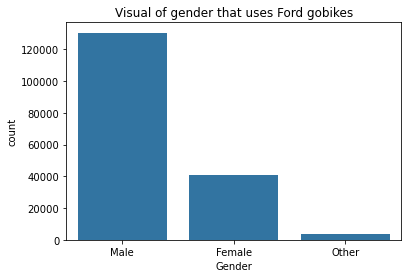

In [10]:
base_color = sns.color_palette()[0]
gender_order = data_clean['member_gender'].value_counts()
sns.countplot(data = data_clean, x='member_gender',order = gender_order.index,  color=base_color)
plt.xlabel('Gender')
plt.title('Visual of gender that uses Ford gobikes');

## Ford gobike users by User_type

The subscriber user_type has the largest percentage of users with a percentage of 90.5, then followed by the customer user types with a percentage of 9.5

Diamond prices in the dataset take on a very large range of values, from about \$300 at the lowest, to about \$19,000 at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a multimodal shape.

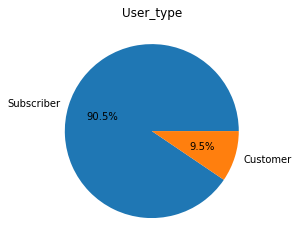

In [11]:
user_data = data_clean['user_type']
plt.pie(data= user_data, x= user_data.value_counts(),autopct='%1.1f%%', labels=user_data.value_counts().index)
plt.title('User_type');

## Top start station_name used by members

Market St at 10th St is the mostly used start station, followed by San Francisco Caltrain Station 2  (Townsend St at 4th St), then Berry St at 4th St

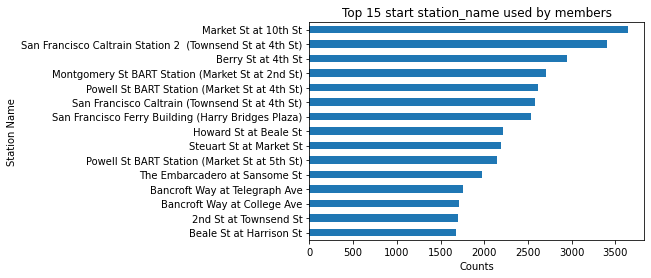

In [12]:
data_clean['start_station_name'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 start station_name used by members')
plt.ylabel('Station Name')
plt.xlabel('Counts');

## Distribution of bike rides ended per end_hour of trip


The most busy hour is 5 PM, second busy hour is 8 AM. The busy hours are 8-9 AM in morning and 4-7PM in the evening. This time is common commuting time.
There is clearly a high number of bike trips during the peak hours when people go to school or work or they commute from it to home. This makes sense since during the weekends less people have to go to work or study as they do during the week days.

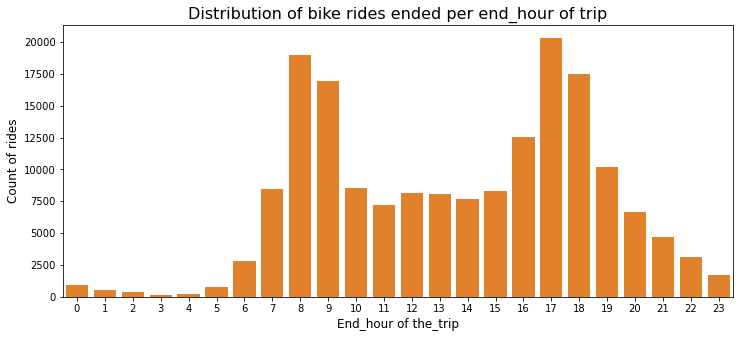

In [13]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=data_clean, x='end_hour', color=base_color)
plt.xlabel('End_hour of the_trip', fontsize=12)
plt.ylabel('Count of rides', fontsize=12)
plt.title('Distribution of bike rides ended per end_hour of trip', fontsize=16);

## Day of the week vs User_types

Subscribers mainly hire a bike during weekdays (more than double), and Customers hire especially in the mid-week(thursday)

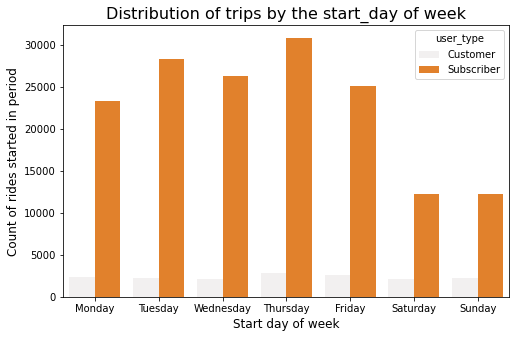

In [14]:
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data_clean['start_day_of_week'] = data_clean['start_day_of_week'].astype(weekdaycat)

sns.countplot(data=data_clean, x='start_day_of_week', hue='user_type', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

## Hours vs member gender

In the first hours of the day there is no a big diffrence but after it become very obvious that the males is the most users

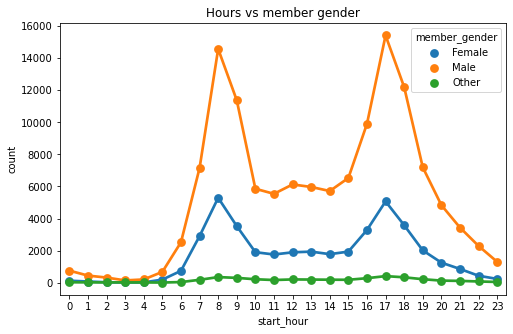

In [15]:
data=data_clean.groupby(["start_hour","member_gender"]).size().reset_index()
plt.figure(figsize=(8, 5))
sns.pointplot(data=data,x="start_hour",hue="member_gender",y=0)
plt.title("Hours vs member gender");
plt.ylabel("count");

## Relationship between `duration_min` of trip and `user_type`

The barplot on the left shows that the average bike trip duration of Customers is almost the double of Subscribers (22 vs 10 minutes).

The violinplot in the middle shows that the that third quartile of Subscribers (13 min) is even below the median of the Customers distribution (15 min).

The boxplot on the right tells that for both user_types there are points above the higher whisker that indicate individual outlier points that are more than 1.5 times the IQR above the third quartile.

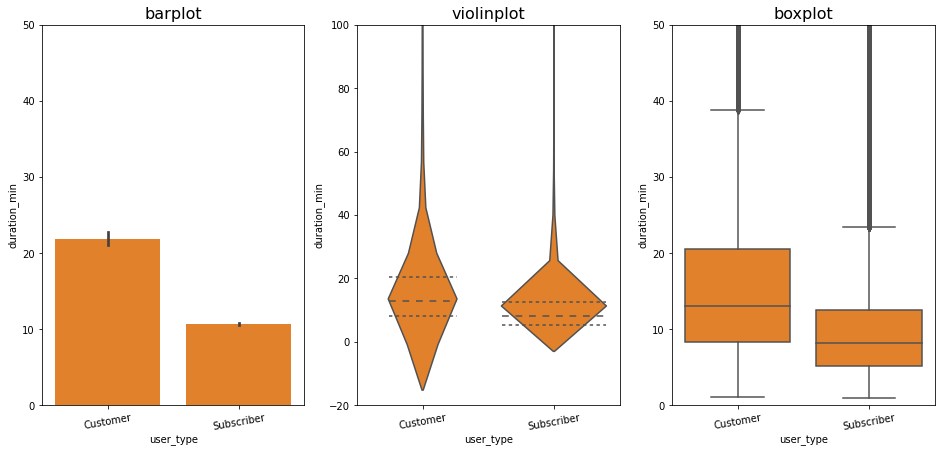

In [16]:
plt.figure(figsize = [16, 7])
base_color = sns.color_palette()[1]

# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sns.violinplot(data = data_clean, x = 'user_type', y = 'duration_min', inner='quartile', color = base_color)       
            # by setting inner = 'quartile' in violin plot, three lines will be plotted within each violin area for the three middle quartiles. 
            # The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.
plt.xticks(rotation = 10)             # include label rotation due to small subplot size
plt.ylim(-20,100)
plt.title('violinplot', fontsize=16)

# left plot: barplot
plt.subplot(1, 3, 1)
sns.barplot(data = data_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(0,50)              # set y-axis limits to be same as left plot
plt.title('barplot', fontsize=16);

# right plot: boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data = data_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(0,50)              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);

## Hours by Day of the week and User_type

It is interesting, that Customers tend to use the bike service mostly on Thursday and friday (8am and 5pm), while Subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 16-18 PM)

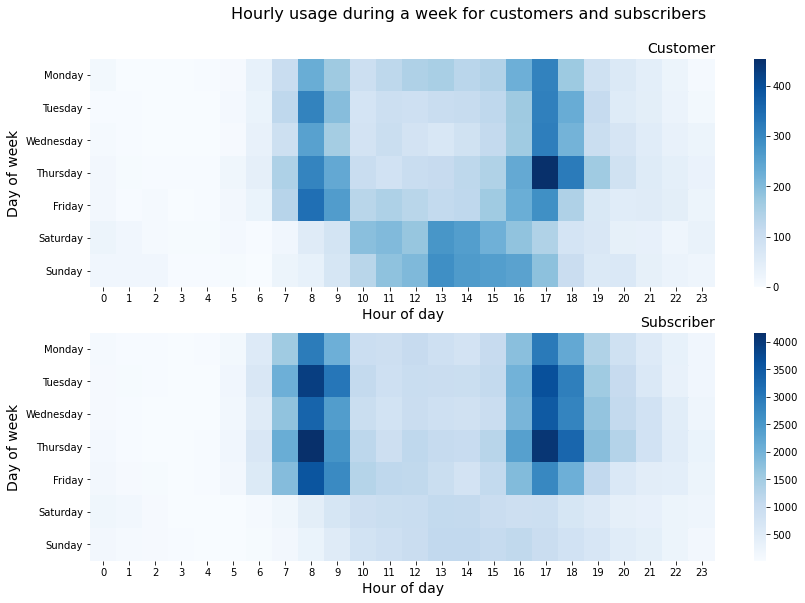

In [17]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = data_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
sns.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = data_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
sns.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

In [18]:
!jupyter nbconvert Example_Project_Diamonds_Part2.ipynb --to slides --post serve --no-input --no-prompt

^C
